<p style="margin-block-start: 1em; margin-block-end: 1em; margin-inline-start: 0px; margin-inline-end: 0px; vertical-align: middle; text-align: center;  border: 3px solid green; ">
    <a target="_top" href="https://colab.research.google.com/github/maksteel/GLabs_Data_Science_Learn/blob/master/Data Exploration of Automobile Data/notebook/Data Exploration of Automobile Data_MK.ipynb">
      <img style="height: 4rem; padding-right: 0.5rem; vertical-align: middle;" src="https://colab.research.google.com/img/colab_favicon.ico">
      <strong style="font-size: 2em; vertical-align: middle;">View in Colab</strong>
    </a>
  </p>

# Resources used in the session:
* [What is EDA?](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm)
* [Categorical Encoding](https://pbpython.com/categorical-encoding.html)
* [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* [Data Science Lifecycle](http://sudeep.co/data-science/Understanding-the-Data-Science-Lifecycle/)
* [TDSP-documentation](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle)
* [TDSP-presentation](https://slideplayer.com/slide/13392497/)
* [ML Code in production system](https://images.anandtech.com/doci/14466/DataPipelineSculley.png) or [full article](https://www.anandtech.com/show/14466/intel-xeon-cascade-lake-vs-nvidia-turing)

# Data Exploration of Automobile Data

Cars contain 50 or more sensors which collect data on speed, emissions, fuel consumption, usage data for resources, and security. All these data can be used to find patterns and resolve quality issues either in the nick of time or prevent them from happening altogether. Analytics is being used to increase both customer satisfaction and quality management at a cost-effective level. In this session we are doing some basic analysis of automobile data which the learners can further expand on.


#### Data Set 1:

Cleaned data.

#### Data set 2:

Raw data with missing values.

#### Data Description:

[Source: UCI ML Repo](https://archive.ics.uci.edu/ml/datasets/Automobile)

This data set consists of three types of entities:

(a) the specification of an auto in terms of various characteristics

(b) its assigned insurance risk rating

(c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.


No of instances : 205

No of attributes : 26




#### Attribute Information:
* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)

Missing Attribute Values: normalized-losses and horsepower have missing values





In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Part A: EDA 


### Task 1: Load the data  stored in `data_1` using `.read_csv()` api.
Get an overview of your data by using `info()` and `describe()` functions of pandas.

In [2]:
df = pd.read_csv('../data/data_1.csv')
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   make          205 non-null    object 
 2   fuel-type     205 non-null    object 
 3   body-style    205 non-null    object 
 4   drive-wheels  205 non-null    object 
 5   wheel-base    205 non-null    float64
 6   length        205 non-null    float64
 7   width         205 non-null    float64
 8   height        205 non-null    float64
 9   horsepower    205 non-null    int64  
 10  peak-rpm      205 non-null    int64  
 11  highway-mpg   205 non-null    int64  
 12  city-mpg      205 non-null    int64  
 13  price         205 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


#### Insight: Seems no null values

In [4]:
df.describe()

,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,104.936585,5127.804878,30.751220,25.219512,13476.258537
std,1.245307,6.021776,12.337289,2.145204,2.443522,40.609702,478.414007,6.886443,6.542142,8114.166248
min,-2.000000,86.600000,141.100000,60.300000,47.800000,48.000000,4150.000000,16.000000,13.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,70.000000,4800.000000,25.000000,19.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,95.000000,5200.000000,30.000000,24.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,116.000000,5500.000000,34.000000,30.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,288.000000,6600.000000,54.000000,49.000000,45400.000000


#### Insight: No cars have -3 symboling rating,

looking for skewness?
* med > mean = right  
* med < mean = left

**price distribution is left skewed**

### Task 2: Plot a histogram showing the distribution of the car prices (target variable).

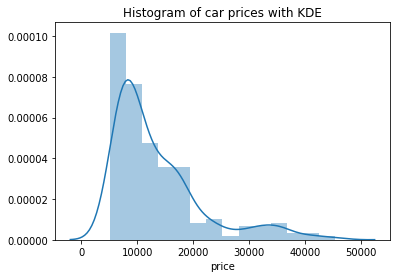

In [5]:
sns.distplot(df.price)
plt.title('Histogram of car prices with KDE')
plt.show()

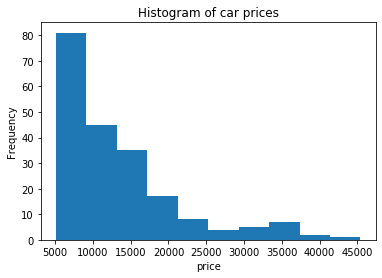

In [6]:
# Same plot with Pandas
df.price.plot.hist(title="Histogram of car prices")
plt.xlabel('price')
plt.show()

#### Let's define the problem statement: 

**Predict the price of the budget cars i.e. price < \\$20K**

### Task 3: Plot a countplot of the 'make' column of the dataset which represents the different car makers.

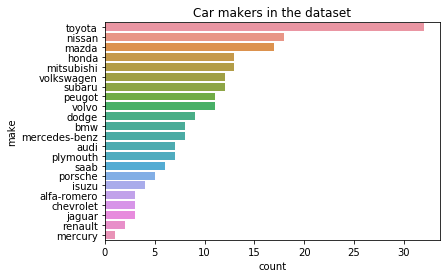

In [7]:
# By default SNS countplot will order the bars according to ascending order of the label, here makers
# Change the order to ascending/ descending order of size of bars use this pandas trick
## see Github issue for details https://github.com/mwaskom/seaborn/issues/1029#issuecomment-342365439
sns.countplot(y='make', data=df, order = df['make'].value_counts().index)
plt.title('Car makers in the dataset')
plt.show()

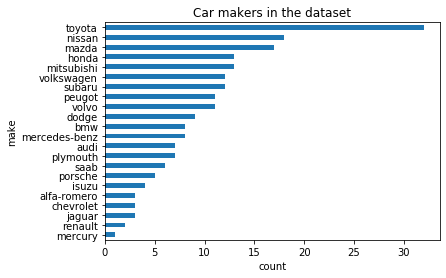

In [8]:
# Same using Pandas, somewhat straight forward
df.make.value_counts(ascending=True).plot.barh(title='Car makers in the dataset')
plt.xlabel('count')
plt.ylabel('make')
plt.show()

#### Insight: Top 6 car makers are Japanese

### Task 3.1: Do these Japanese car maker manufacture budget cars?

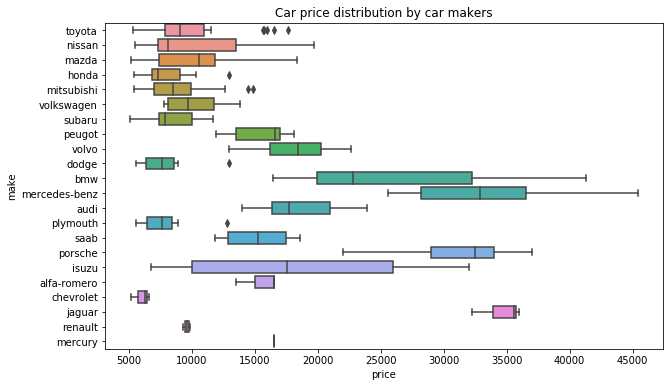

In [9]:
# lets make a box-plot with while keeping the sorting order as per the countplot above
plt.figure(figsize=(10,6))
sns.boxplot(y='make',x='price',data=df, order=df['make'].value_counts().index)
plt.title('Car price distribution by car makers')
plt.show()

#### Insight: Japanese makers are the ones making more of these budget cars

### Task 4: Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.



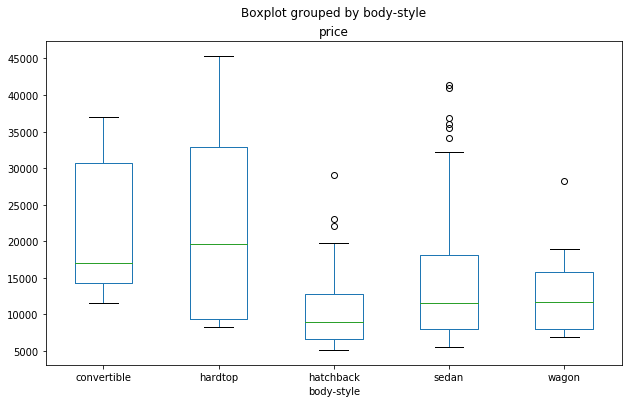

In [10]:
df.boxplot(by='body-style', column=['price'], grid=False, rot=0, figsize=(10,6))
plt.show()

#### Insight: body-style is a good predictor, mostly hactchback and wagon are the budget cars

### Task 5: Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

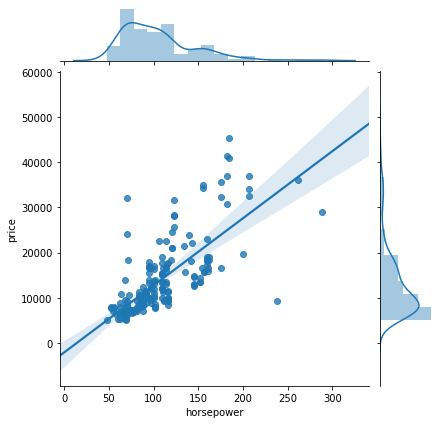

In [11]:
sns.jointplot(x='horsepower', y='price', data=df, kind='reg')
plt.show()

#### Insight: horsepower seems to have a linear relationship with price, so its a good predictor

### Task 6: Plot the correlation heatmap of the data.

In [12]:
# one way to check the correlation is to use df.corr() and check for a threshold like 0.7
(df.corr().abs()>0.6)['price']

symboling      False
wheel-base     False
length          True
width           True
height         False
horsepower      True
peak-rpm       False
highway-mpg     True
city-mpg        True
price           True
Name: price, dtype: bool

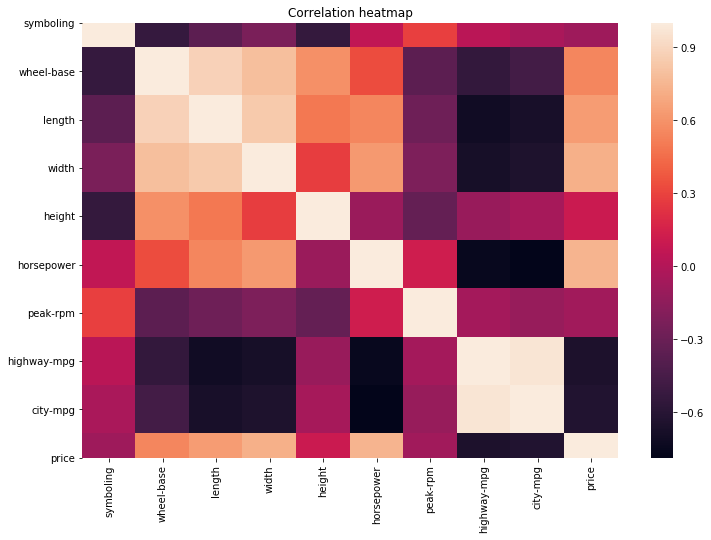

In [13]:
# if you'd like to see correlation with all the numeric columns then use heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.title('Correlation heatmap')
plt.show()

## Part B: Data Cleaning and Feature Engineering

### Task 7: Load the data  stored in `data_2` using `.read_csv()` api.



In [14]:
df = pd.read_csv("../data/data_2.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


#### Insight: Seems no null values or is it?

In [16]:
# a quick peek in the data shows missing values are actually marked as '?'
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Task 8: Impute the missing values of the numerical data with mean of the particular column (Make sure you replace "?" by "NaN" before Imputing).



In [17]:
# replace the "?" with special string "NaN", because thats how Imputer likes it
df.replace('?', 'NaN', inplace=True)  # this is not np.NaN

In [18]:
# initialize the Imputer to replace missing values with the mean of the column
numeric_imp = Imputer(missing_values="NaN", strategy='mean', axis=0)

In [19]:
# remember fit_transform wants a 2D array 
df.horsepower.shape , df['horsepower'].shape, df[['horsepower']].shape

((205,), (205,), (205, 1))

In [20]:
# Lets find the mean i.e. do the fit and then replace missing values with it i.e. transform
df.horsepower = numeric_imp.fit_transform(df[['horsepower']])

In [21]:
# and do the same for normalized-losses column
df['normalized-losses'] = numeric_imp.fit_transform(df[['normalized-losses']])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


#### Now, normalized-losses and horsepower are numeric types

### Task 9: Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.



In [23]:
# before sqrt transformation
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [24]:
# perform sqrt transformation to numeric columns
numeric_featuers = df.select_dtypes(exclude=['object']).columns
for feature in numeric_featuers:
    if skew(df[feature]) > 1:
        print('transforming', feature)
        df[feature] = np.sqrt(df[feature])


transforming engine-size
transforming horsepower
transforming price


In [25]:
# after sqrt transformation
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,11.401754,10.535654,21,27,116.167982
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,11.401754,10.535654,21,27,128.452326
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,12.328828,12.409674,19,26,128.452326
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,10.440307,10.099505,24,30,118.110118
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,11.661904,10.723805,18,22,132.098448


### Task 10: Label Encode the categorical features.



In [26]:
# before label encoding
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,11.401754,10.535654,21,27,116.167982
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,11.401754,10.535654,21,27,128.452326
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,12.328828,12.409674,19,26,128.452326
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,10.440307,10.099505,24,30,118.110118
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,11.661904,10.723805,18,22,132.098448


In [27]:
# perform label encoding to categorical columns
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

In [28]:
# after label encoding
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,64.1,48.8,0,11.401754,10.535654,21,27,116.167982
1,3,122.0,0,1,0,2,0,64.1,48.8,0,11.401754,10.535654,21,27,128.452326
2,1,122.0,0,1,2,2,0,65.5,52.4,5,12.328828,12.409674,19,26,128.452326
3,2,164.0,1,1,3,1,0,66.2,54.3,3,10.440307,10.099505,24,30,118.110118
4,2,164.0,1,1,3,0,0,66.4,54.3,3,11.661904,10.723805,18,22,132.098448


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   body-style         205 non-null    int64  
 5   drive-wheels       205 non-null    int64  
 6   engine-location    205 non-null    int64  
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    int64  
 10  engine-size        205 non-null    float64
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 24.1 KB


#### Now, all the features are numerical, we are almost ready to do model training

### Task 11: Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [30]:
# Since height and width usually related, let us engineer a new feature called area
df['area'] = df.height * df.width
df.area

0      3128.08
1      3128.08
2      3432.20
3      3594.66
4      3605.52
        ...   
200    3823.95
201    3818.40
202    3823.95
203    3823.95
204    3823.95
Name: area, Length: 205, dtype: float64

---